In [5]:
import scanpy as sc

import glob
import os

import numpy as np
import anndata
import tables
import scipy.sparse as sp
import pandas as pd
import collections
from typing import Union, Dict, Tuple, List, Callable
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from typing import Optional
import os, sys, string
import h5py
import tables
import anndata
import collections

from harmony import harmonize
import scanpy.external as sce

import scrublet

In [2]:
##pip install scrublet

In [3]:
#sc.__version__
print(sc.__version__)
print(anndata.__version__)
print(h5py.__version__)
print()

1.9.2
0.8.0
3.8.0



In [4]:
home      = "/Users/shayat/Documents/Aachen/projects/training_gcb2023/"
datahome  = home+ "data/"
resulthome= home+ "results/"

In [8]:
filename = 'snRNA-seq-submission_training_scleaned.h5ad'

## Code start

In [9]:
adata = sc.read_h5ad(datahome+filename)

In [10]:
adata

AnnData object with n_obs × n_vars = 38825 × 27593
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'sample_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [11]:
adata.obs.head()

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,patient,patient_group,...,is_primary_data,organism_ontology_term_id,sex_ontology_term_id,tissue_ontology_term_id,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scrublet
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK158,9255.0,4157,0.086440,0.478381,0.127749,Adipocyte,control_P1,P1,myogenic,...,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084,0,4157,9255.0,8.0,0.086440,0.375723
GTAGGAGTCCGTATAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK158,5917.0,1540,0.033801,0.112845,-0.017195,Adipocyte,control_P1,P1,myogenic,...,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084,0,1539,5914.0,2.0,0.033818,0.092742
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,4226.0,2238,0.189304,0.333294,0.030336,Adipocyte,RZ/FZ_P5,P5,myogenic,...,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084,0,2238,4226.0,8.0,0.189304,0.315217
ACTTAGGTCTAATTCC-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,931.0,660,0.214823,0.000417,0.066989,Adipocyte,RZ/FZ_P5,P5,myogenic,...,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084,0,660,931.0,2.0,0.214823,0.135593
ATAGACCTCAAGCTTG-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,CK159,1052.0,792,0.000000,0.000224,0.121526,Adipocyte,RZ/FZ_P5,P5,myogenic,...,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084,0,792,1052.0,0.0,0.000000,0.072519


In [12]:
adata.obs['sample'].drop_duplicates()

ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0    CK158
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0    CK159
AAAGTCCCATCATCTT-1_1_1_1_1_1_1_1_1_1_1_1_1_1-0      CK160
ACTGATGGTACCTAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1-0      CK161
AAAGGGCTCATAGCAC-1_1_1_1_1_1_1_1_1_1_1_1_1-0        CK162
CCTCAACGTACTCGTA-1_2_1_1_1_1_1_1_1_1_1_1_1-0        CK163
AACAAAGCAGAGAGGG-1_1_1_1_1_1_1_1_1_1_1_1-0          CK164
TTTACGTGTTGCGGCT-1_2_1_1_1_1_1_1_1_1_1_1-0          CK165
AGGTAGGCAGAGTGAC-1_1_1_1_1_1_1_1_1_1_1-0            CK356
GTAATCGAGCGATTCT-1_2_1_1_1_1_1_1_1_1_1-0            CK357
ATTCACTTCCCGTGTT-1_1_1_1_1_1_1_1_1_1-0              CK358
ACTCTCGTCCGCGAGT-1_2_1_1_1_1_1_1_1_1-0              CK359
ATTTACCAGGCTGGAT-1_1_1_1_1_1_1_1_1-0                CK360
CACCGTTTCGCGTAGC-1_2_1_1_1_1_1_1_1-0                CK361
CAGCACGGTTTCGCTC-1_1_1_1_1_1_1_1-0                  CK362
ATCCATTAGAGAGGTA-1_2_1_1_1_1_1_1-0                  CK363
AAAGTGAAGCTACAAA-1_2_1_1_1_1_1-0                    CK365
AACAAGATCTAATT

In [13]:
# Check to make sure it's still counts
adata[:,'TTN'].X.todense()

matrix([[ 5.],
        [ 6.],
        [11.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]], dtype=float32)

In [14]:
#adata = adata.raw.to_adata()

In [15]:
# Check to make sure it's still counts
adata[:,'TTN'].X.todense()

matrix([[ 5.],
        [ 6.],
        [11.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]], dtype=float32)

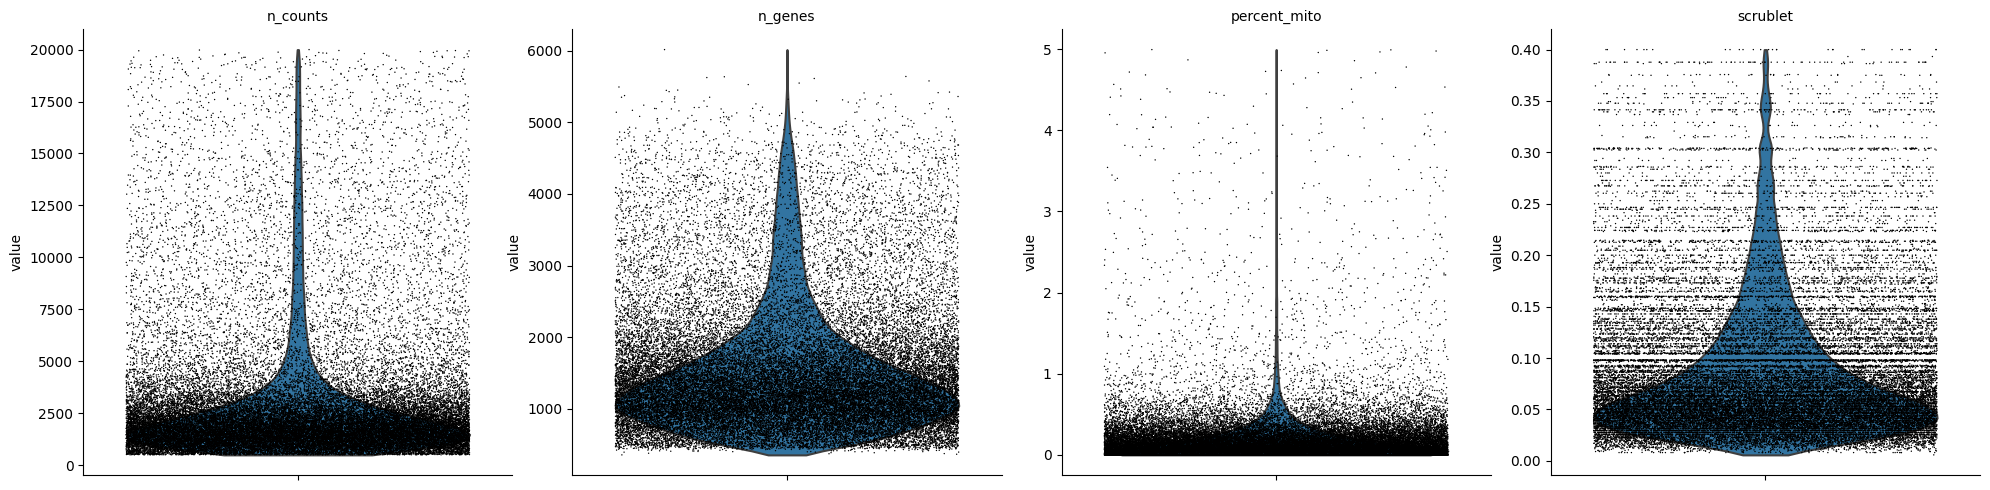

In [17]:
sc.pl.violin(adata, ['n_counts', 'n_genes', 'percent_mito', 'scrublet'],\
             jitter=0.4, multi_panel=True)

In [18]:
cluster_key = 'cell_type_original'

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


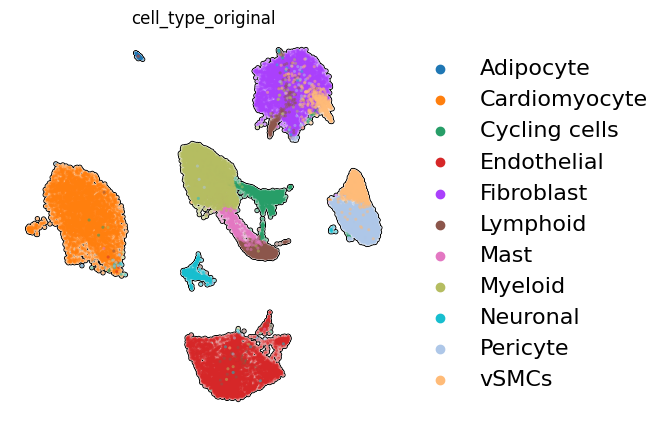

In [19]:
plt.figure(figsize=(5, 5))
sc.pl.embedding(adata, add_outline=True, basis='umap', color=cluster_key,\
                ax=plt.gca(), alpha=0.5, size=20, legend_fontsize=16,legend_fontoutline=8,\
                frameon=False, show=True)

In [20]:
adata.obs[['patient_region_id', 'patient_group', 'major_labl']]\
.drop_duplicates().sort_values(by='major_labl')

,patient_region_id,patient_group,major_labl
AAAGTCCCATCATCTT-1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,RZ/BZ_P3,myogenic,BZ
TTGGGTAGTAGGTCAG-1_1_1_1_1_1_1-1,RZ/BZ_P12,myogenic,BZ
CCTCAACGTACTCGTA-1_2_1_1_1_1_1_1_1_1_1_1_1-0,RZ/BZ_P2,myogenic,BZ
ACACCAAGTGTCATGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1-0,control_P1,myogenic,CTRL
CTCCACAGTTGAGGAC-1_1-0,control_P17,myogenic,CTRL
GTAATCGAGCGATTCT-1_2_1_1_1_1_1_1_1_1_1-0,control_P7,myogenic,CTRL
ATTCACTTCCCGTGTT-1_1_1_1_1_1_1_1_1_1-0,control_P8,myogenic,CTRL
ACCTGTCGTCTACAGT-1_2_1_1_1_1_1_1_1_1_1_1_1_1_1-0,RZ/FZ_P5,myogenic,FZ
AAAGGGCTCATAGCAC-1_1_1_1_1_1_1_1_1_1_1_1_1-0,FZ/GT_P4,fibrotic,FZ
AAATGGATCGTGACTA-1_1_1_1-0,FZ_P20,fibrotic,FZ


In [23]:
# Check to make sure it's still counts
adata[:,'TTN'].X.todense()

matrix([[ 5.],
        [ 6.],
        [11.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]], dtype=float32)

In [25]:
temp_counter_df = adata.obs.reset_index()[["index", "sample"]].groupby("sample").count().reset_index()

from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (15, 3)}):
    ax = temp_counter_df.plot.bar(x='sample', y="index", rot=90)

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


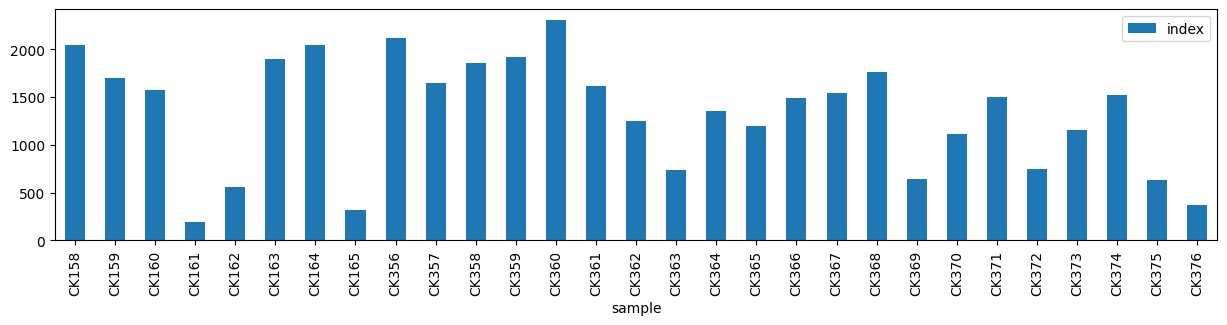

<Figure size 1200x1200 with 0 Axes>

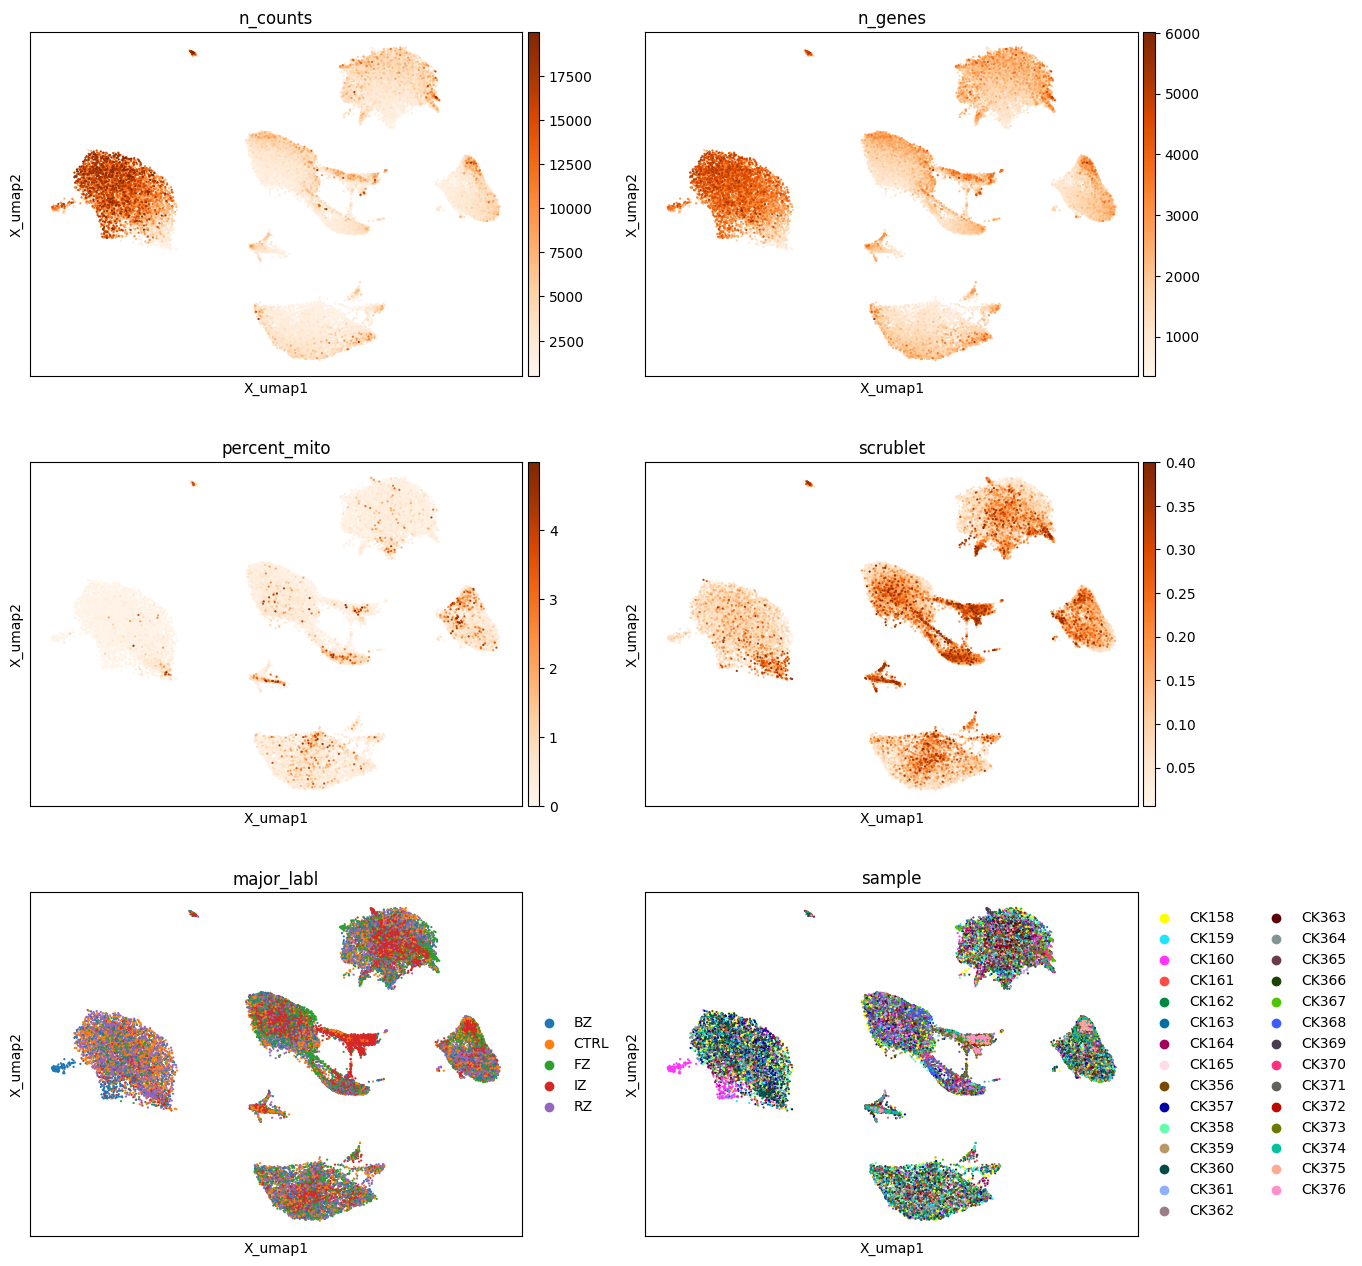

In [26]:
f = plt.figure(figsize = (12,12))

sc.pl.embedding(adata, basis='X_umap', color=['n_counts', 'n_genes', 'percent_mito', 'scrublet'\
                                                          , 'major_labl', 'sample'], ncols=2,
                color_map='Oranges', size=10, show=True)
plt.tight_layout()

#plt.savefig('Kidney_ADPKD_Human_features.pdf', bbox_inches='tight')

In [27]:
adata.var.sort_values(by='n_cells')

,feature_biotype,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
FAM160A1-DT,gene,3,False,3,0.000076,99.992378,3.0
AC021483.2,gene,3,False,3,0.000076,99.992378,3.0
AC120114.2,gene,3,False,3,0.000076,99.992378,3.0
AC012186.2,gene,3,False,3,0.000076,99.992378,3.0
MAGI2-AS1,gene,3,False,3,0.000076,99.992378,3.0
...,...,...,...,...,...,...,...
LAMA2,gene,32859,False,32859,9.375915,16.516768,369036.0
RYR2,gene,34942,False,34942,25.322840,11.224593,996707.0
TTN,gene,35930,False,35930,37.609325,8.714431,1480303.0
NEAT1,gene,38455,False,38455,20.992353,2.299289,826259.0


/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Figure size 640x480 with 0 Axes>

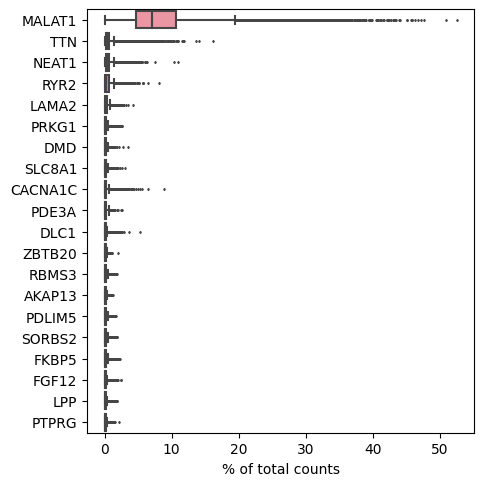

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [29]:
adata = adata[:, ~adata.var_names.str.startswith('MALAT')].copy()

In [30]:
adata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'sample_colors', 'major_labl_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [31]:
bdata = adata.copy()

bdata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_original_colors', 'sample_colors', 'major_labl_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [32]:
## Seurat V3 needs raw counts
sc.pp.highly_variable_genes(bdata, n_top_genes = 2000, flavor = 'seurat_v3')

In [33]:
sc.pp.normalize_total(bdata, target_sum=1e4)
sc.pp.log1p(bdata)

In [34]:
cdata = bdata[:, bdata.var.highly_variable]

In [35]:
#sc.pp.regress_out(cdata, ['n_umi', 'mito_fraction'])

In [36]:
sc.tl.pca(cdata, svd_solver='arpack', n_comps = 50)

In [37]:
sce.pp.harmony_integrate(cdata, 'sample', max_iter_harmony=40)

2023-09-09 23:59:10,040 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-09-09 23:59:17,003 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-09-09 23:59:17,280 - harmonypy - INFO - Iteration 1 of 40
2023-09-09 23:59:30,587 - harmonypy - INFO - Iteration 2 of 40
2023-09-09 23:59:42,996 - harmonypy - INFO - Iteration 3 of 40
2023-09-09 23:59:55,259 - harmonypy - INFO - Iteration 4 of 40
2023-09-10 00:00:08,152 - harmonypy - INFO - Iteration 5 of 40
2023-09-10 00:00:19,977 - harmonypy - INFO - Iteration 6 of 40
2023-09-10 00:00:26,784 - harmonypy - INFO - Iteration 7 of 40
2023-09-10 00:00:32,074 - harmonypy - INFO - Iteration 8 of 40
2023-09-10 00:00:37,348 - harmonypy - INFO - Iteration 9 of 40
2023-09-10 00:00:42,535 - harmonypy - INFO - Iteration 10 of 40
2023-09-10 00:00:48,186 - harmonypy - INFO - Iteration 11 of 40
2023-09-10 00:00:53,333 - harmonypy - INFO - Iteration 12 of 40
2023-09-10 00:00:59,406 - harmonypy - INFO - Iteration 13 of

In [38]:
Z = cdata.obsm['X_pca_harmony']

In [39]:
bdata.obsm['X_pca_harmony'] = Z

In [40]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs=50, use_rep = 'X_pca_harmony',\
                metric = 'cosine', key_added = 'PC_harmony')

2023-09-10 00:01:20.084037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [41]:
sc.tl.umap(bdata, neighbors_key = 'PC_harmony', min_dist = 0.05)

In [42]:
res_list = [0.1, 0.3, 0.5,0.7]#, 0.9, 1.1, 1.3]

for res in res_list:
    print(res)
    sc.tl.leiden(bdata, resolution = res, key_added = 'leiden'+str(res), neighbors_key = 'PC_harmony')

0.1
0.3
0.5
0.7


In [43]:
bdata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_type_original_colors', 'sample_colors', 'major_labl_colors', 'hvg', 'log1p', 'PC_harmony', 'umap', 'leiden'
    obsm: 'X_harmony', 'X_p

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


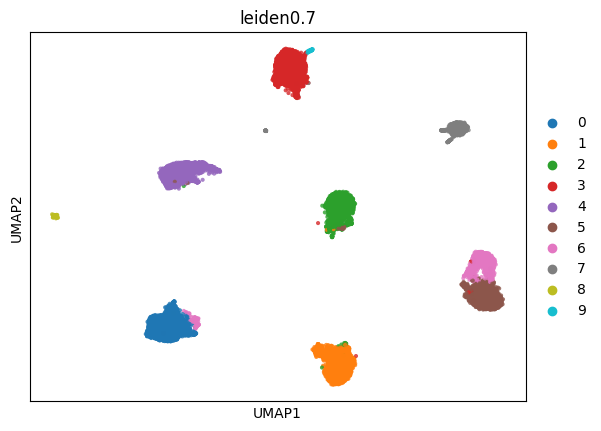

In [46]:
res = 0.7
sc.pl.embedding(bdata, basis='umap', color='leiden'+str(res), ax=plt.gca(), show=True, alpha=0.8, size=35)

In [48]:
bdata

AnnData object with n_obs × n_vars = 38825 × 27592
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet', 'leiden0.1', 'leiden0.3', 'leiden0.5', 'leiden0.7'
    var: 'feature_biotype', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_type_original_colors', 'sample_colors', 'major_labl_colors', 'hvg', 'log1p', 'PC_harmony', 'umap', 'leiden', 'leiden0.1_colors', 'leide

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 1200x1200 with 0 Axes>

<Figure size 1455.6x1440 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

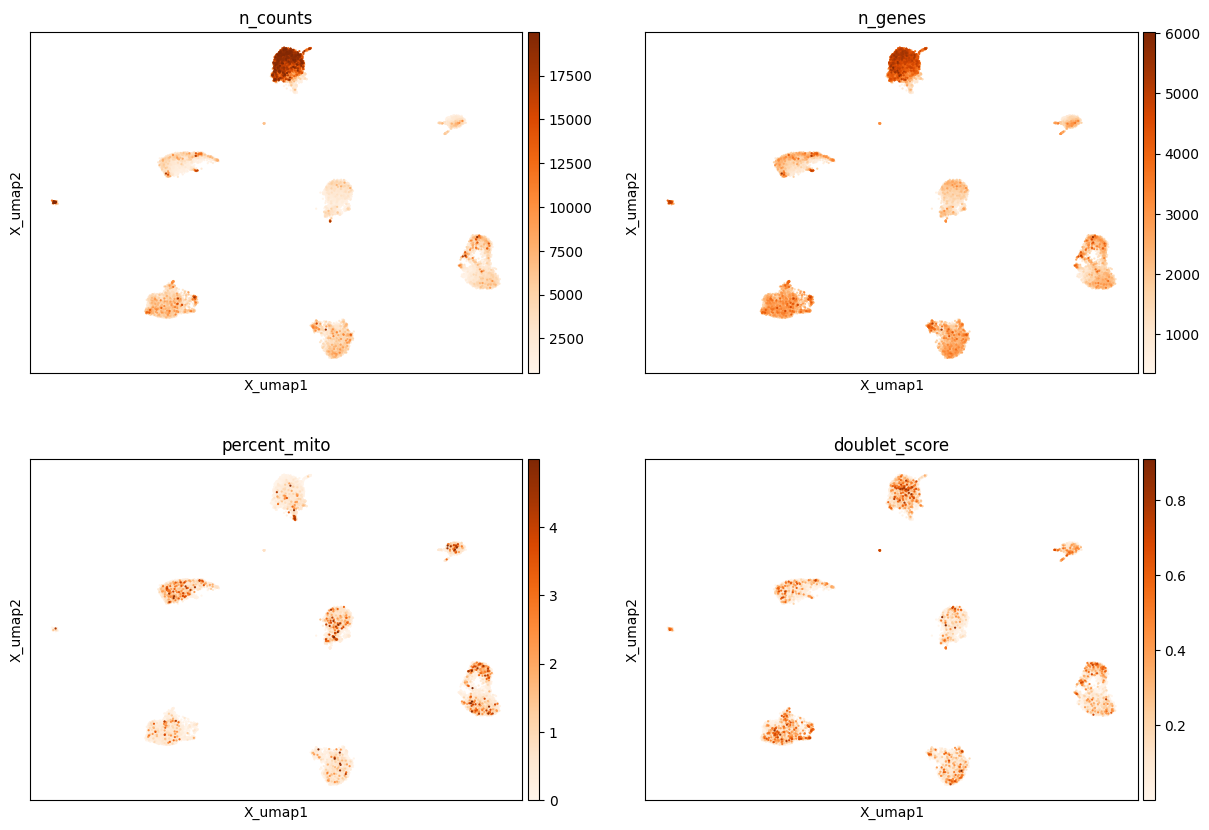

<Figure size 1200x1200 with 0 Axes>

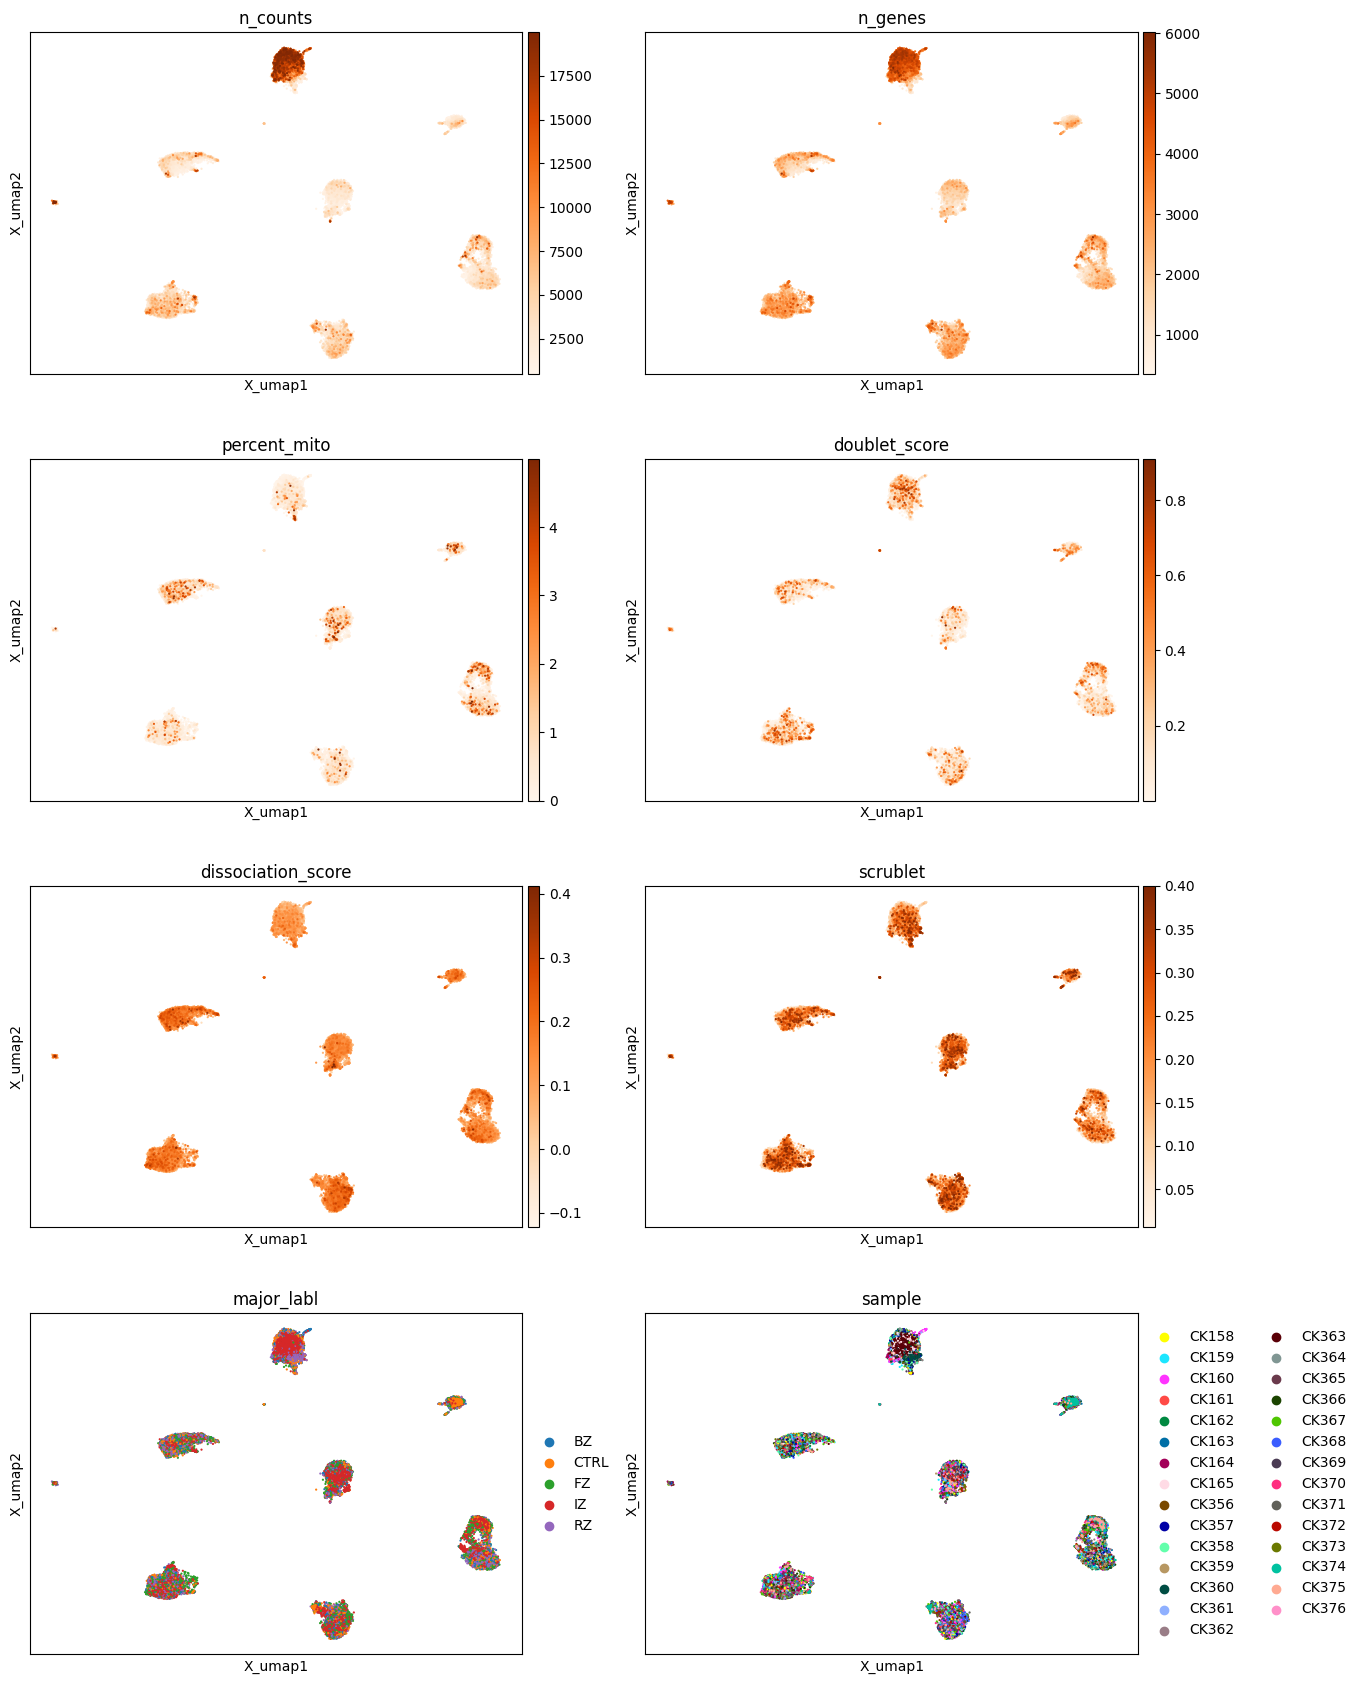

In [50]:
f = plt.figure(figsize = (12,12))

sc.pl.embedding(bdata, basis='X_umap', color=['n_counts', 'n_genes', 'percent_mito', 'doublet_score',\
                                              'dissociation_score', 'scrublet',\
                                              'major_labl', 'sample'], ncols=2,
                color_map='Oranges', size=10, show=True)
plt.tight_layout()

#plt.savefig('Human_features.pdf', bbox_inches='tight')


In [51]:
cluster_id = 'leiden'+str(res)

In [53]:
pd.crosstab(bdata.obs[cluster_id], bdata.obs['cell_type_original'])

cell_type_original,Adipocyte,Cardiomyocyte,Cycling cells,Endothelial,Fibroblast,Lymphoid,Mast,Myeloid,Neuronal,Pericyte,vSMCs
leiden0.7,,,,,,,,,,,
0,5,1,1018,20,4679,257,1,17,8,31,251
1,1,3,775,23,23,52,250,4688,18,15,3
2,17,3,432,81,87,4454,412,152,50,103,10
3,24,4873,80,114,130,135,18,75,59,178,71
4,2,1,370,4717,8,15,4,5,6,20,3
5,0,0,175,0,10,20,2,8,9,4408,85
6,5,0,38,3,8,7,0,0,0,211,2262
7,2,0,2,1,2,1,0,1,2216,0,0
8,427,1,1,0,1,1,0,0,0,4,0


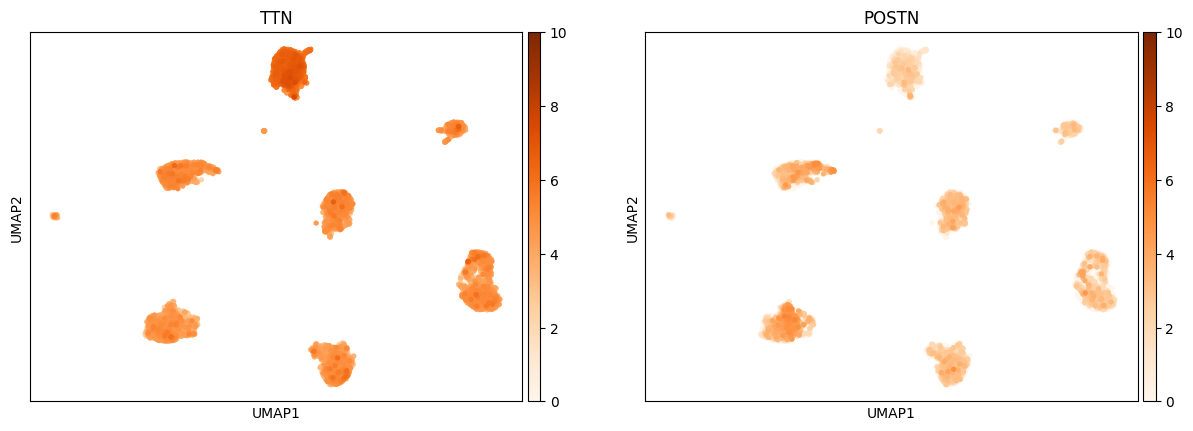

In [57]:
genenames =  ["TTN", "POSTN"]
sc.pl.embedding(bdata, basis='umap', color=genenames, color_map='Oranges', size=60, ncols=3, vmax=10)

In [60]:
print("Finding markers")
sc.tl.rank_genes_groups(bdata,
                                groupby='leiden'+str(res),
                                key_added='rank_genes_groups' + str(res),
                                method='wilcoxon',
                                use_raw=False)

Finding markers


In [61]:
# copy back over to adata
res_list = [0.1, 0.3, 0.5,0.7]#, 0.9, 1.1, 1.3]

for res in res_list:
    print(res)
    try:
        adata.obsm['X_umap'] = bdata.obsm['X_umap']
    except:
        print('Failed in copying over X_umap data')
    try:
        adata.obsm['X_pca_harmony'] = bdata.obsm['X_pca_harmony']
    except:
        print('Failed in copying over X_pca_harmony data')
    try:
        adata.obs['leiden' + str(res)] = bdata.obs['leiden' + str(res)]
    except:
        print('Failed in copying over leiden clustering data')
    try:
        adata.uns['rank_genes_groups' + str(res)] = bdata.uns['rank_genes_groups' + str(res)]
    except:
        print('Failed in copying over rank_genes_groups data')
    try:
        adata.uns['filter_rank_genes_groups' + str(res)] = bdata.uns['filter_rank_genes_groups' + str(res)]
    except:
        print('Failed in copying over filter_rank_genes_groups data')

    if '__is_in_cluster__' in bdata.obs.keys():
        del adata.obs['__is_in_cluster__']

0.1
Failed in copying over rank_genes_groups data
Failed in copying over filter_rank_genes_groups data
0.3
Failed in copying over rank_genes_groups data
Failed in copying over filter_rank_genes_groups data
0.5
Failed in copying over rank_genes_groups data
Failed in copying over filter_rank_genes_groups data
0.7
Failed in copying over filter_rank_genes_groups data


In [65]:
#del adata.uns["filter_rank_genes_groups" + str(res)]

In [66]:
filename

'snRNA-seq-submission_training_scleaned.h5ad'

In [67]:
mytitle = filename[:-5] + "_r1_2023"
print(mytitle)

snRNA-seq-submission_training_scleaned_r1_2023


In [69]:
# Check to make sure it's still counts
adata[:,'NEAT1'].X.todense()

matrix([[103.],
        [  2.],
        [ 20.],
        ...,
        [  5.],
        [  4.],
        [  5.]], dtype=float32)

## Plot marker genes

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


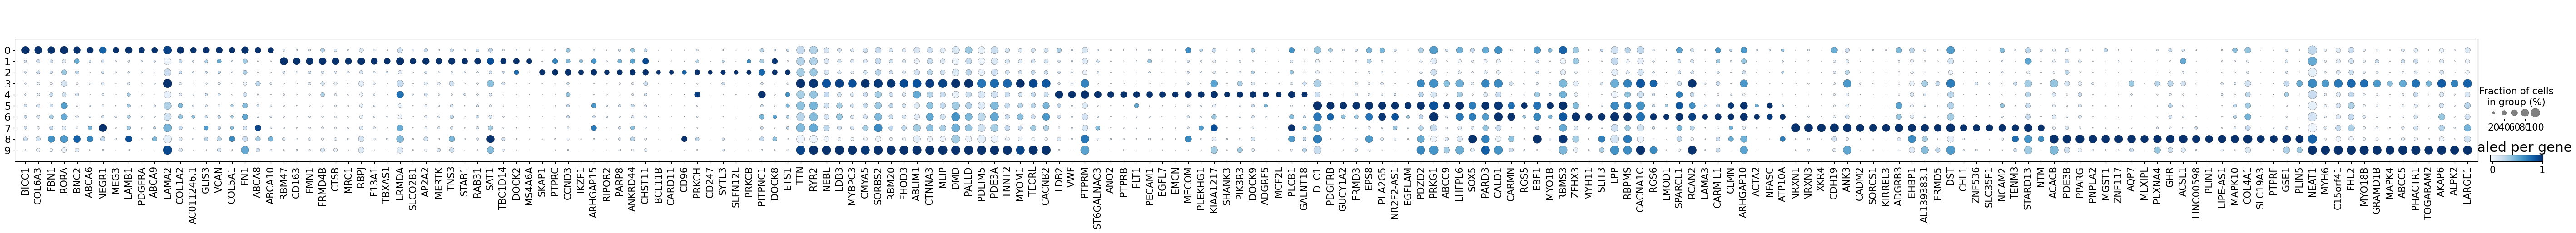

In [70]:
# plot marker genes
#res = 0.9
cluster_id = 'leiden'+ str(res)

plt.rcParams.update({'font.size': 18})
n = 20

marker_key = 'rank_genes_groups' + str(res)
#marker_key = 'filter_rank_genes_groups' + str(res)

marker_genes = np.array(bdata.uns[marker_key]['names'][:(n + 5)].tolist(), 
                        dtype=str).transpose()

unique_markers = []

for k in range(marker_genes.shape[0]):
    i = 0
    for g in marker_genes[k, :]:
        if i < n and g not in unique_markers and g != 'nan':
            unique_markers.append(g)
            i += 1

#unique_markers.append("Postn")

sc.pl.dotplot(bdata, var_names=unique_markers, groupby='leiden'+str(res), \
                                 use_raw=False, vmin=-0.05,
              vmax=1.01,cmap='Blues', standard_scale='var', show=False)

plt.title('Scaled per gene')
plt.show()

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


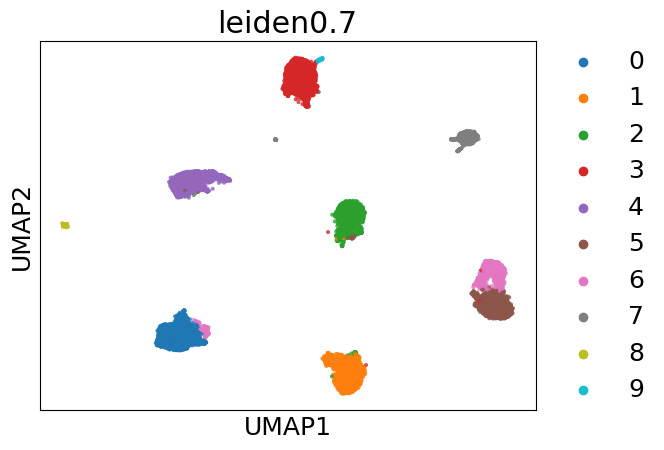

In [71]:
res = 0.7
sc.pl.embedding(bdata, basis='umap', color='leiden'+str(res), ax=plt.gca(), show=True, alpha=0.8, size=35)

In [72]:
adata.write(datahome + mytitle+ ".h5ad")

/Users/shayat/opt/anaconda3/envs/newenv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


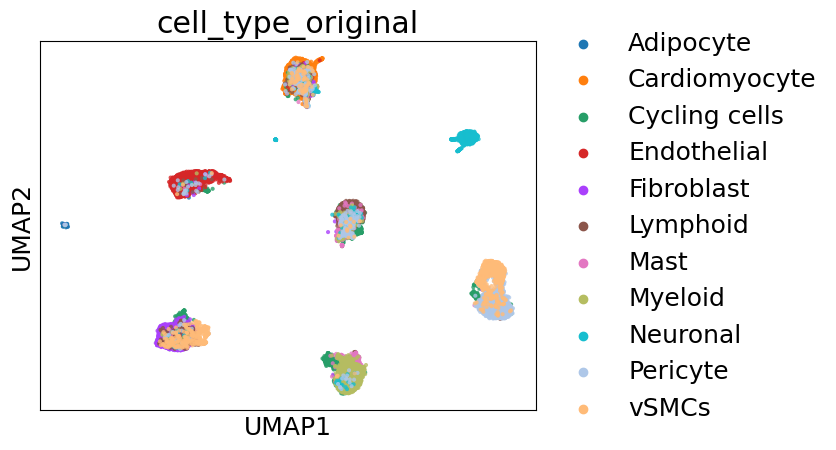

In [73]:
res = 0.7
sc.pl.embedding(bdata, basis='umap', color=cluster_key, ax=plt.gca(), show=True, alpha=0.8, size=35)